In [39]:
import openmatrix as omx
import numpy as np
import pandas as pd
import os
pd.options.display.max_columns = 100

In [40]:
data_dir = r'C:\abm_runs\rsg\abm3_dev\run_dir\data_full'

## Appending Data to Landuse

### External Station Data

In [44]:
ext_data = pd.read_csv(os.path.join(data_dir, 'externalInternalControlTotalsByYear.csv'))
ext_data = ext_data[ext_data.year == 2016].reset_index(drop=True)

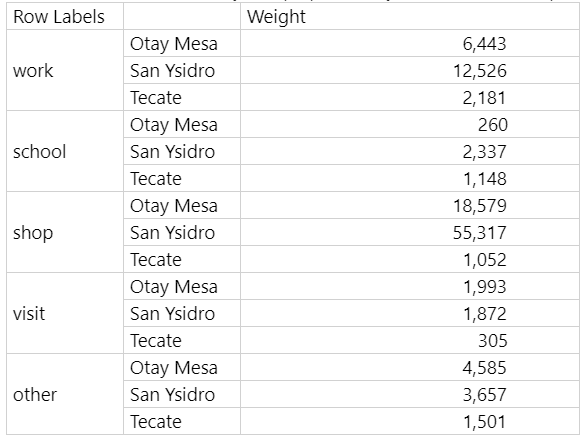

Placeholder data is derived from this table of tour weights from the crossborder survey. (Provided by Hannah). The estimated values is 20% of the purpose total * 2 to convert from tours to trips.  The other 80% of border crossings are assumed to be from Mexican residents.

In [45]:
# placeholder values for border crossings
ext_data.loc[len(ext_data)] = ['2016', 1, 12526 * 0.2 * 2, (2337+55317+1872+3657) * 0.2 * 2]
ext_data.loc[len(ext_data)] = ['2016', 2, 6443 * 0.2 * 2, (260+18579+1993+4585) * 0.2 * 2]
ext_data.loc[len(ext_data)] = ['2016', 4, 2181 * 0.2 * 2, (1148+1052+305+1501) * 0.2 * 2]
# dummy for other external taz's that are not yet active
# (all 4996 TAZs need to be listed in the landuse file or the output trip omx trip matrices aren't the right shape!)
ext_data.loc[len(ext_data)] = ['2016', 3, 0, 0]
ext_data.loc[len(ext_data)] = ['2016', 5, 0, 0]
ext_data.loc[len(ext_data)] = ['2016', 11, 0, 0]
ext_data

,year,taz,work,nonwork
0,2016,6,2807.0,4588.0
1,2016,7,190.0,312.0
2,2016,8,371.0,875.0
3,2016,9,486.0,1146.0
4,2016,10,46951.0,27175.0
5,2016,12,23190.0,32503.0
6,2016,1,5010.4,25273.2
7,2016,2,2577.2,10166.8
8,2016,4,872.4,1602.4
9,2016,3,0.0,0.0


In [46]:
ext_data.sort_values(by='taz')

,year,taz,work,nonwork
6,2016,1,5010.4,25273.2
7,2016,2,2577.2,10166.8
9,2016,3,0.0,0.0
8,2016,4,872.4,1602.4
10,2016,5,0.0,0.0
0,2016,6,2807.0,4588.0
1,2016,7,190.0,312.0
2,2016,8,371.0,875.0
3,2016,9,486.0,1146.0
4,2016,10,46951.0,27175.0


In [47]:
landuse = pd.read_csv(os.path.join(data_dir, 'land_use_pre_externals.csv'))

# dropping crossborder columns
cols_to_drop = [col for col in landuse.columns if '_wait_' in col]
landuse.drop(columns=cols_to_drop, inplace=True)

# setting MAZ as index
landuse.set_index('MAZ', inplace=True)
landuse

,TAZ,hs,hs_sf,hs_mf,hs_mh,hh,hh_sf,hh_mf,hh_mh,gq_civ,gq_mil,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,hhs,pop,hhp,emp_ag,emp_const_non_bldg_prod,emp_const_non_bldg_office,emp_utilities_prod,emp_utilities_office,emp_const_bldg_prod,emp_const_bldg_office,emp_mfg_prod,emp_mfg_office,emp_whsle_whs,emp_trans,emp_retail,emp_prof_bus_svcs,emp_prof_bus_svcs_bldg_maint,emp_pvt_ed_k12,emp_pvt_ed_post_k12_oth,emp_health,emp_personal_svcs_office,emp_amusement,emp_hotel,emp_restaurant_bar,emp_personal_svcs_retail,emp_religious,emp_pvt_hh,emp_state_local_gov_ent,emp_fed_non_mil,...,adultschenrl,ech_dist,hch_dist,pseudomsa,parkarea,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,zip09,parkactive,openspaceparkpreserve,beachactive,budgetroom,economyroom,luxuryroom,midpriceroom,upscaleroom,hotelroomtotal,luz_id,truckregiontype,district27,milestocoast,acres,effective_acres,land_acres,MicroAccessTime,remoteAVParking,refueling_stations,totint,duden,empden,popden,retempden,totintbin,empdenbin,dudenbin,PopEmpDenPerMi,poe_id,original_MAZ,external_TAZ,external_MAZ,external_size_term_placeholder,colonia_pop_accessibility
MAZ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3331,19,19,0,0,18,18,0,0,0,0,2,0,3,0,1,2,2,3,3,2,2.278,41,41,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,3,0,0,0,0,0,0,0,0,0,...,0,432801,432801,2,4,0,0,0,0,0,0,0,0,0,0,92103,0.0,6.4752,0.0,0,0,0,0,0,0,95,1,27,3.7997,16.6154,12.9615,16.6154,10,0,0,89,2.9402,0.2775,7.1755,0.0080,2,1,1,4769.9316,-1,-1,-1,-1,0,NaN
2,3331,35,35,0,0,34,34,0,0,0,0,1,0,4,4,0,2,3,1,5,14,2.382,81,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,432801,432801,2,4,0,0,0,0,0,0,0,0,0,0,92103,0.0,7.9650,0.0,0,0,0,0,0,0,95,1,27,3.9761,19.5192,19.5192,19.5192,10,0,0,138,3.6723,0.7957,8.5756,0.0841,3,1,1,5997.6499,-1,-1,-1,-1,0,NaN
3,3358,52,52,0,0,52,52,0,0,0,0,3,1,4,1,4,3,2,3,8,23,2.135,111,111,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,432801,432801,2,3,0,0,1,0,0,0,1,0,0,1,92103,0.0,14.5405,0.0,0,0,0,0,0,0,95,1,27,4.1939,27.8451,26.8679,27.8451,10,0,0,122,3.8058,1.4096,8.8477,0.2349,2,1,1,6564.6648,-1,-1,-1,-1,0,NaN
4,3358,30,30,0,0,30,30,0,0,0,0,5,1,0,1,1,4,2,4,1,11,2.433,73,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,432801,432801,2,3,0,0,1,0,0,0,1,0,0,1,92103,0.0,3.0679,0.0,0,0,0,0,0,0,95,1,27,4.2782,7.9762,7.9762,7.9762,10,0,0,167,4.4406,2.0544,9.9730,0.2353,3,1,1,7697.5471,-1,-1,-1,-1,0,NaN
5,3358,28,28,0,0,28,28,0,0,0,0,2,2,1,0,1,3,0,2,8,9,2.250,63,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,432801,432801,2,4,0,0,0,0,0,0,0,0,0,0,92103,0.0,0.4773,0.0,0,0,0,0,0,0,95,1,27,4.0062,7.0725,7.0637,7.0725,10,0,0,161,3.5488,1.1705,8.2097,0.1519,3,1,1,6003.2876,-1,-1,-1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23001,1254,83,83,0,0,80,80,0,0,0,0,3,6,9,8,5,8,9,1,12,19,2.600,208,208,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,3,0,0,0,0,0,0,1,0,0,...,0,431201,431201,6,4,0,0,0,0,0,0,0,0,0,0,92011,0.0,8.0269,0.0,0,0,0,0,0,0,14,1,1,2.7063,41.0061,28.1261,41.0061,120,0,0,37,2.0662,4.6858,5.6451,0.8117,1,1,1,6611.8330,-1,-1,-1,-1,0,NaN
23002,1254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,431201,431201,6,4,0,0,0,0,0,0,0,0,0,0,92011,0.0,11.4923,0.0,0,0,0,0,0,0,14,1,1,2.4553,50.8237,34.1310,50.8237,120,0,0,37,2.1866,0.1492,6.1511,0.0000,1,1,1,4032.2383,-1,-1,-1,-1,0,NaN
23003,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,

In [48]:
for index, row in ext_data.iterrows():
    if (row['taz'] in landuse.TAZ.values):
        ext_maz_num = landuse[landuse.TAZ == row['taz']].index[0]
    else:
        ext_maz_num = landuse.index.max() + 1
        landuse.loc[ext_maz_num] = 0
        landuse.loc[ext_maz_num, 'poe_id'] = -1

    landuse.loc[ext_maz_num, 'TAZ'] = row['taz']
    landuse.loc[ext_maz_num, 'external_work'] = row['work']
    landuse.loc[ext_maz_num, 'external_nonwork'] = row['nonwork']
    landuse.loc[ext_maz_num, 'external_TAZ'] = 1
    landuse.loc[ext_maz_num, 'external_MAZ'] = 1
    
    
landuse['external_work'] = landuse['external_work'].fillna(0)
landuse['external_nonwork'] = landuse['external_nonwork'].fillna(0)

In [49]:
landuse

,TAZ,hs,hs_sf,hs_mf,hs_mh,hh,hh_sf,hh_mf,hh_mh,gq_civ,gq_mil,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,hhs,pop,hhp,emp_ag,emp_const_non_bldg_prod,emp_const_non_bldg_office,emp_utilities_prod,emp_utilities_office,emp_const_bldg_prod,emp_const_bldg_office,emp_mfg_prod,emp_mfg_office,emp_whsle_whs,emp_trans,emp_retail,emp_prof_bus_svcs,emp_prof_bus_svcs_bldg_maint,emp_pvt_ed_k12,emp_pvt_ed_post_k12_oth,emp_health,emp_personal_svcs_office,emp_amusement,emp_hotel,emp_restaurant_bar,emp_personal_svcs_retail,emp_religious,emp_pvt_hh,emp_state_local_gov_ent,emp_fed_non_mil,...,hch_dist,pseudomsa,parkarea,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,zip09,parkactive,openspaceparkpreserve,beachactive,budgetroom,economyroom,luxuryroom,midpriceroom,upscaleroom,hotelroomtotal,luz_id,truckregiontype,district27,milestocoast,acres,effective_acres,land_acres,MicroAccessTime,remoteAVParking,refueling_stations,totint,duden,empden,popden,retempden,totintbin,empdenbin,dudenbin,PopEmpDenPerMi,poe_id,original_MAZ,external_TAZ,external_MAZ,external_size_term_placeholder,colonia_pop_accessibility,external_work,external_nonwork
MAZ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3331,19,19,0,0,18,18,0,0,0,0,2,0,3,0,1,2,2,3,3,2,2.278,41,41,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,3,0,0,0,0,0,0,0,0,0,...,432801,2,4,0,0,0,0,0,0,0,0,0,0,92103,0.0,6.4752,0.0,0,0,0,0,0,0,95,1,27,3.7997,16.6154,12.9615,16.6154,10,0,0,89,2.9402,0.2775,7.1755,0.0080,2,1,1,4769.9316,-1,-1,-1,-1,0,NaN,0.0,0.0
2,3331,35,35,0,0,34,34,0,0,0,0,1,0,4,4,0,2,3,1,5,14,2.382,81,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,432801,2,4,0,0,0,0,0,0,0,0,0,0,92103,0.0,7.9650,0.0,0,0,0,0,0,0,95,1,27,3.9761,19.5192,19.5192,19.5192,10,0,0,138,3.6723,0.7957,8.5756,0.0841,3,1,1,5997.6499,-1,-1,-1,-1,0,NaN,0.0,0.0
3,3358,52,52,0,0,52,52,0,0,0,0,3,1,4,1,4,3,2,3,8,23,2.135,111,111,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,...,432801,2,3,0,0,1,0,0,0,1,0,0,1,92103,0.0,14.5405,0.0,0,0,0,0,0,0,95,1,27,4.1939,27.8451,26.8679,27.8451,10,0,0,122,3.8058,1.4096,8.8477,0.2349,2,1,1,6564.6648,-1,-1,-1,-1,0,NaN,0.0,0.0
4,3358,30,30,0,0,30,30,0,0,0,0,5,1,0,1,1,4,2,4,1,11,2.433,73,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,432801,2,3,0,0,1,0,0,0,1,0,0,1,92103,0.0,3.0679,0.0,0,0,0,0,0,0,95,1,27,4.2782,7.9762,7.9762,7.9762,10,0,0,167,4.4406,2.0544,9.9730,0.2353,3,1,1,7697.5471,-1,-1,-1,-1,0,NaN,0.0,0.0
5,3358,28,28,0,0,28,28,0,0,0,0,2,2,1,0,1,3,0,2,8,9,2.250,63,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,432801,2,4,0,0,0,0,0,0,0,0,0,0,92103,0.0,0.4773,0.0,0,0,0,0,0,0,95,1,27,4.0062,7.0725,7.0637,7.0725,10,0,0,161,3.5488,1.1705,8.2097,0.1519,3,1,1,6003.2876,-1,-1,-1,-1,0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23010,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0,0,0,0.0000,-1,0,1,1,0,0.0,46951.0,27175.0
23011,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0,0,0,0.0000,-1,0,1,1,0,0.0,23190.0,32503.0
23012,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0.0000,0.0000,0.0000,0.

In [50]:
landuse.loc[landuse.external_MAZ == 1, ['TAZ', 'external_MAZ', 'poe_id', 'external_work', 'external_nonwork']]

,TAZ,external_MAZ,poe_id,external_work,external_nonwork
MAZ,,,,,
23003,1,1,0,5010.4,25273.2
23004,2,1,1,2577.2,10166.8
23005,4,1,2,872.4,1602.4
23006,6,1,-1,2807.0,4588.0
23007,7,1,-1,190.0,312.0
23008,8,1,-1,371.0,875.0
23009,9,1,-1,486.0,1146.0
23010,10,1,-1,46951.0,27175.0
23011,12,1,-1,23190.0,32503.0


### Transponder Accessibility Data

In [51]:
transponder_data = pd.read_csv(os.path.join(data_dir, 'transponderModelAccessibilities.csv'))
transponder_data.rename(columns={'DIST':'ML_DIST'}, inplace=True)
transponder_data

,TAZ,ML_DIST,AVGTTS,PCTDETOUR
0,1,23.3595,0.07718,0.0
1,2,24.6553,0.07730,0.0
2,3,25.3481,0.07730,0.0
3,4,34.4558,0.07716,0.0
4,5,58.1259,0.07716,0.0
...,...,...,...,...
4991,4992,21.6715,0.07727,0.0
4992,4993,21.9069,0.07727,0.0
4993,4994,21.8131,0.07726,0.0
4994,4995,21.8696,0.07733,0.0


In [52]:
landuse = pd.merge(landuse.reset_index(), transponder_data, how='left', on='TAZ').set_index('MAZ')

In [53]:
landuse

,TAZ,hs,hs_sf,hs_mf,hs_mh,hh,hh_sf,hh_mf,hh_mh,gq_civ,gq_mil,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,hhs,pop,hhp,emp_ag,emp_const_non_bldg_prod,emp_const_non_bldg_office,emp_utilities_prod,emp_utilities_office,emp_const_bldg_prod,emp_const_bldg_office,emp_mfg_prod,emp_mfg_office,emp_whsle_whs,emp_trans,emp_retail,emp_prof_bus_svcs,emp_prof_bus_svcs_bldg_maint,emp_pvt_ed_k12,emp_pvt_ed_post_k12_oth,emp_health,emp_personal_svcs_office,emp_amusement,emp_hotel,emp_restaurant_bar,emp_personal_svcs_retail,emp_religious,emp_pvt_hh,emp_state_local_gov_ent,emp_fed_non_mil,...,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,zip09,parkactive,openspaceparkpreserve,beachactive,budgetroom,economyroom,luxuryroom,midpriceroom,upscaleroom,hotelroomtotal,luz_id,truckregiontype,district27,milestocoast,acres,effective_acres,land_acres,MicroAccessTime,remoteAVParking,refueling_stations,totint,duden,empden,popden,retempden,totintbin,empdenbin,dudenbin,PopEmpDenPerMi,poe_id,original_MAZ,external_TAZ,external_MAZ,external_size_term_placeholder,colonia_pop_accessibility,external_work,external_nonwork,ML_DIST,AVGTTS,PCTDETOUR
MAZ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3331,19,19,0,0,18,18,0,0,0,0,2,0,3,0,1,2,2,3,3,2,2.278,41,41,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,92103,0.0,6.4752,0.0,0,0,0,0,0,0,95,1,27,3.7997,16.6154,12.9615,16.6154,10,0,0,89,2.9402,0.2775,7.1755,0.0080,2,1,1,4769.9316,-1,-1,-1,-1,0,NaN,0.0,0.0,7.9496,0.05233,0.00000
2,3331,35,35,0,0,34,34,0,0,0,0,1,0,4,4,0,2,3,1,5,14,2.382,81,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,92103,0.0,7.9650,0.0,0,0,0,0,0,0,95,1,27,3.9761,19.5192,19.5192,19.5192,10,0,0,138,3.6723,0.7957,8.5756,0.0841,3,1,1,5997.6499,-1,-1,-1,-1,0,NaN,0.0,0.0,7.9496,0.05233,0.00000
3,3358,52,52,0,0,52,52,0,0,0,0,3,1,4,1,4,3,2,3,8,23,2.135,111,111,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1,92103,0.0,14.5405,0.0,0,0,0,0,0,0,95,1,27,4.1939,27.8451,26.8679,27.8451,10,0,0,122,3.8058,1.4096,8.8477,0.2349,2,1,1,6564.6648,-1,-1,-1,-1,0,NaN,0.0,0.0,7.9313,0.05147,0.00000
4,3358,30,30,0,0,30,30,0,0,0,0,5,1,0,1,1,4,2,4,1,11,2.433,73,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1,92103,0.0,3.0679,0.0,0,0,0,0,0,0,95,1,27,4.2782,7.9762,7.9762,7.9762,10,0,0,167,4.4406,2.0544,9.9730,0.2353,3,1,1,7697.5471,-1,-1,-1,-1,0,NaN,0.0,0.0,7.9313,0.05147,0.00000
5,3358,28,28,0,0,28,28,0,0,0,0,2,2,1,0,1,3,0,2,8,9,2.250,63,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,92103,0.0,0.4773,0.0,0,0,0,0,0,0,95,1,27,4.0062,7.0725,7.0637,7.0725,10,0,0,161,3.5488,1.1705,8.2097,0.1519,3,1,1,6003.2876,-1,-1,-1,-1,0,NaN,0.0,0.0,7.9313,0.05147,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23010,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0,0,0,0.0000,-1,0,1,1,0,0.0,46951.0,27175.0,21.9307,0.04102,0.35041
23011,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0,0,0,0.0000,-1,0,1,1,0,0.0,23190.0,32503.0,34.5185,0.03108,0.00000
23012,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0

In [54]:
landuse.to_csv(os.path.join(data_dir, 'land_use.csv'), index=True)

### Creating DIST matrix

In [50]:
myfile = omx.open_file(os.path.join(data_dir, 'traffic_skims_processed_AM.omx'), 'a')
myfile.list_matrices()

['BIKE_LOGSUM',
 'BIKE_LOGSUM__AM',
 'BIKE_TIME',
 'BIKE_TIME__AM',
 'DIST',
 'HOV2_H_DIST__AM',
 'HOV2_H_HOVDIST__AM',
 'HOV2_H_REL__AM',
 'HOV2_H_TIME__AM',
 'HOV2_H_TOLLCOST__AM',
 'HOV2_H_TOLLDIST__AM',
 'HOV2_L_DIST__AM',
 'HOV2_L_HOVDIST__AM',
 'HOV2_L_REL__AM',
 'HOV2_L_TIME__AM',
 'HOV2_L_TOLLCOST__AM',
 'HOV2_L_TOLLDIST__AM',
 'HOV2_M_DIST__AM',
 'HOV2_M_HOVDIST__AM',
 'HOV2_M_REL__AM',
 'HOV2_M_TIME__AM',
 'HOV2_M_TOLLCOST__AM',
 'HOV2_M_TOLLDIST__AM',
 'HOV3_H_DIST__AM',
 'HOV3_H_HOVDIST__AM',
 'HOV3_H_REL__AM',
 'HOV3_H_TIME__AM',
 'HOV3_H_TOLLCOST__AM',
 'HOV3_H_TOLLDIST__AM',
 'HOV3_L_DIST__AM',
 'HOV3_L_HOVDIST__AM',
 'HOV3_L_REL__AM',
 'HOV3_L_TIME__AM',
 'HOV3_L_TOLLCOST__AM',
 'HOV3_L_TOLLDIST__AM',
 'HOV3_M_DIST__AM',
 'HOV3_M_HOVDIST__AM',
 'HOV3_M_REL__AM',
 'HOV3_M_TIME__AM',
 'HOV3_M_TOLLCOST__AM',
 'HOV3_M_TOLLDIST__AM',
 'SOV_NT_H_DIST__AM',
 'SOV_NT_H_REL__AM',
 'SOV_NT_H_TIME__AM',
 'SOV_NT_H_TOLLCOST__AM',
 'SOV_NT_H_TOLLDIST__AM',
 'SOV_NT_L_DIST__AM',
 'SO

In [13]:
sov_tr_dist_AM = myfile['SOV_TR_H_DIST__AM']
myfile['DIST'] = sov_tr_dist_AM
myfile.close()

NodeError: destination group ``/data`` already has a node named ``DIST``; you may want to use the ``overwrite`` argument

## Adding External Stations to maz level skims

In [14]:
maz_ext_taz_xwalk = pd.read_csv(os.path.join(data_dir, 'closest_maz_to_external_tazs.csv'))
maz_ext_taz_xwalk = maz_ext_taz_xwalk.set_index('external_taz')
maz_ext_taz_xwalk

,closest_maz
external_taz,
1,7090
2,7066
3,7123
4,21895
5,22094
6,21470
7,21383
8,21046
9,16216


In [15]:
def add_external_stations_to_skim_df(skim_df, maz_ext_taz_xwalk, landuse, origin_col='OMAZ', dest_col='DMAZ'):
    external_zones = landuse.loc[landuse.external_MAZ == 1, 'TAZ'].to_frame()
    assert external_zones.index.name == 'MAZ', 'landuse index not MAZ'
    assert maz_ext_taz_xwalk.index.name == 'external_taz', 'external zone crosswalk index not external_taz'
    skim_length = len(skim_df)
    
    new_connections = []

    for ext_taz, ext_maz in zip(external_zones['TAZ'].values, external_zones.index):
        if ext_maz not in skim_df[origin_col].values:
            print(f"missing external maz {ext_maz}")
            closest_maz = maz_ext_taz_xwalk.loc[ext_taz, 'closest_maz']
            print(f"\t closest internal maz {closest_maz}")
            od_connections = skim_df.loc[skim_df[origin_col] == closest_maz].copy()
            print(f"\t origins with this internal maz {len(od_connections)}")
            od_connections[origin_col] = ext_maz
            new_connections.append(od_connections)
            
            if dest_col is not None:
                do_connections = skim_df.loc[skim_df[dest_col] == closest_maz].copy()
                do_connections[dest_col] = ext_maz
                print(f"\t destinations with this internal maz {len(do_connections)}")
                new_connections.append(do_connections)

    new_connections = pd.concat(new_connections)
    updated_skim = pd.concat([skim_df, new_connections])
    print(f"Added {len(updated_skim) - skim_length} O-D pairs to skim file")
    return updated_skim

#### MAZ - MAZ walk

In [16]:
maz_maz_walk = pd.read_csv(os.path.join(data_dir, 'maz_maz_walk_pre_externals.csv'))

In [17]:
maz_maz_walk_updated = add_external_stations_to_skim_df(maz_maz_walk, maz_ext_taz_xwalk, landuse)
maz_maz_walk_updated

missing external maz 23006
	 closest internal maz 21470
	 origins with this internal maz 8
	 destinations with this internal maz 8
missing external maz 23007
	 closest internal maz 21383
	 origins with this internal maz 14
	 destinations with this internal maz 14
missing external maz 23008
	 closest internal maz 21046
	 origins with this internal maz 10
	 destinations with this internal maz 10
missing external maz 23009
	 closest internal maz 16216
	 origins with this internal maz 15
	 destinations with this internal maz 15
missing external maz 23010
	 closest internal maz 15889
	 origins with this internal maz 45
	 destinations with this internal maz 45
missing external maz 23011
	 closest internal maz 15308
	 origins with this internal maz 2
	 destinations with this internal maz 2
Added 188 O-D pairs to skim file


,OMAZ,DMAZ,walkTime,dist,mmTime,mmCost,mtTime,mtCost,mmGenTime,mtGenTime,minTime
0,1,1,0.561,0.02805,11.1122,0.827952,999.0,999.0,74.424008,999.0,0.561
1,1,2,3.774,0.18870,11.7548,0.930768,999.0,999.0,75.477872,999.0,3.774
2,1,3,14.010,0.70050,13.8020,1.258320,999.0,999.0,78.835280,999.0,14.010
3,1,4,14.037,0.70185,13.8074,1.259184,999.0,999.0,78.844136,999.0,14.037
4,1,5,7.299,0.36495,12.4598,1.043568,999.0,999.0,76.634072,999.0,7.299
...,...,...,...,...,...,...,...,...,...,...,...
7473783,15943,23010,58.602,2.93010,132.7204,2.685264,999.0,999.0,203.461456,999.0,58.602
7402939,23011,15307,49.223,2.46115,130.8446,2.385136,999.0,999.0,200.385144,999.0,49.223
7402940,23011,15308,24.612,1.23060,125.9224,1.597584,999.0,999.0,192.312736,999.0,24.612
7402938,15307,23011,49.223,2.46115,130.8446,2.385136,999.0,999.0,200.385144,999.0,49.223


In [18]:
maz_maz_walk_updated.to_csv(os.path.join(data_dir, 'maz_maz_walk.csv'), index=False)

#### MAZ-TAP walk

In [19]:
maz_tap_walk = pd.read_csv(os.path.join(data_dir, 'maz_tap_walk_pre_externals.csv'))

In [20]:
maz_tap_walk

,MAZ,TAP,walkTime,dist,mmTime,mmCost,mtTime,mtCost,mmGenTime,mtGenTime,minTime
0,1,1790,18.227,0.91135,14.6454,1.393264,999.0,999.0,80.218456,999.0,18.227
1,1,1589,2.939,0.14695,11.5878,0.904048,999.0,999.0,75.203992,999.0,2.939
2,1,1591,3.520,0.17600,11.7040,0.922640,999.0,999.0,75.394560,999.0,3.520
3,1,1630,9.943,0.49715,12.9886,1.128176,999.0,999.0,77.501304,999.0,9.943
4,2,1589,6.142,0.30710,12.2284,1.006544,999.0,999.0,76.254576,999.0,6.142
...,...,...,...,...,...,...,...,...,...,...,...
130058,23003,2485,2.990,0.14950,121.5980,0.905680,999.0,999.0,185.220720,999.0,2.990
130059,23003,2486,2.990,0.14950,121.5980,0.905680,999.0,999.0,185.220720,999.0,2.990
130060,23004,2475,8.137,0.40685,122.6274,1.070384,999.0,999.0,186.908936,999.0,8.137
130061,23004,2463,14.387,0.71935,123.8774,1.270384,999.0,999.0,188.958936,999.0,14.387


In [21]:
maz_tap_walk_updated = add_external_stations_to_skim_df(
    maz_tap_walk, maz_ext_taz_xwalk, landuse, origin_col='MAZ', dest_col=None)
maz_tap_walk_updated

missing external maz 23005
	 closest internal maz 21895
	 origins with this internal maz 0
missing external maz 23006
	 closest internal maz 21470
	 origins with this internal maz 0
missing external maz 23007
	 closest internal maz 21383
	 origins with this internal maz 0
missing external maz 23008
	 closest internal maz 21046
	 origins with this internal maz 0
missing external maz 23009
	 closest internal maz 16216
	 origins with this internal maz 0
missing external maz 23010
	 closest internal maz 15889
	 origins with this internal maz 0
missing external maz 23011
	 closest internal maz 15308
	 origins with this internal maz 0
Added 0 O-D pairs to skim file


,MAZ,TAP,walkTime,dist,mmTime,mmCost,mtTime,mtCost,mmGenTime,mtGenTime,minTime
0,1,1790,18.227,0.91135,14.6454,1.393264,999.0,999.0,80.218456,999.0,18.227
1,1,1589,2.939,0.14695,11.5878,0.904048,999.0,999.0,75.203992,999.0,2.939
2,1,1591,3.520,0.17600,11.7040,0.922640,999.0,999.0,75.394560,999.0,3.520
3,1,1630,9.943,0.49715,12.9886,1.128176,999.0,999.0,77.501304,999.0,9.943
4,2,1589,6.142,0.30710,12.2284,1.006544,999.0,999.0,76.254576,999.0,6.142
...,...,...,...,...,...,...,...,...,...,...,...
130058,23003,2485,2.990,0.14950,121.5980,0.905680,999.0,999.0,185.220720,999.0,2.990
130059,23003,2486,2.990,0.14950,121.5980,0.905680,999.0,999.0,185.220720,999.0,2.990
130060,23004,2475,8.137,0.40685,122.6274,1.070384,999.0,999.0,186.908936,999.0,8.137
130061,23004,2463,14.387,0.71935,123.8774,1.270384,999.0,999.0,188.958936,999.0,14.387


In [22]:
maz_tap_walk[maz_tap_walk.MAZ.isin(maz_ext_taz_xwalk.closest_maz)]

,MAZ,TAP,walkTime,dist,mmTime,mmCost,mtTime,mtCost,mmGenTime,mtGenTime,minTime
72282,7066,2475,8.137,0.40685,122.6274,1.070384,999.0,999.0,186.908936,999.0,8.137
72283,7066,2463,14.387,0.71935,123.8774,1.270384,999.0,999.0,188.958936,999.0,14.387
72284,7066,2477,7.076,0.35380,122.4152,1.036432,999.0,999.0,186.560928,999.0,7.076
72397,7090,2479,18.173,0.90865,124.6346,1.391536,999.0,999.0,190.200744,999.0,18.173
72398,7090,820,12.405,0.62025,123.4810,1.206960,999.0,999.0,188.308840,999.0,12.405
72399,7090,2481,8.873,0.44365,122.7746,1.093936,999.0,999.0,187.150344,999.0,8.873
72400,7090,2483,19.240,0.96200,124.8480,1.425680,999.0,999.0,190.550720,999.0,19.240
72401,7090,2484,14.154,0.70770,123.8308,1.262928,999.0,999.0,188.882512,999.0,14.154
72402,7090,2485,2.990,0.14950,121.5980,0.905680,999.0,999.0,185.220720,999.0,2.990
72403,7090,2486,2.990,0.14950,121.5980,0.905680,999.0,999.0,185.220720,999.0,2.990


maz_tap_walk file already has connections for ext tazs 1 and 2.  None of the other external tazs match to an internal maz with tap connections.

In [23]:
maz_tap_walk_updated.to_csv(os.path.join(data_dir, 'maz_tap_walk.csv'), index=False)

### Creating maz to tap drive time file

In [24]:
accessam = pd.read_csv(os.path.join(data_dir, 'accessam.csv'), names=['TAZ', 'TAP', 'DTIME', 'DDIST', 'mode'])

In [25]:
accessam

,TAZ,TAP,DTIME,DDIST,mode
0,13,258,11.570780,4.129364,5
1,13,259,11.570780,4.129364,4
2,13,264,21.509853,7.110552,5
3,13,1801,10.754732,3.692096,5
4,13,778,14.920745,5.850626,5
...,...,...,...,...,...
73132,4996,2280,12.743272,8.608012,5
73133,4996,1764,24.352701,20.214727,4
73134,4996,1608,20.925344,17.006960,6
73135,4996,1607,20.925344,17.006960,7


In [26]:
len(accessam.TAP.unique())

105

In [27]:
lot_to_tap_dist = pd.read_csv(os.path.join(data_dir, 'tap.ptype'), names=['TAP', 'lot_id', 'ptype', 'TAZ', 'capacity', 'distance_ft', 'mode'], sep=' ', skipinitialspace=True)
lot_to_tap_dist['WDIST'] = lot_to_tap_dist['distance_ft']
lot_to_tap_dist

,TAP,lot_id,ptype,TAZ,capacity,distance_ft,mode,WDIST
0,34,47,1,150,100,150,10,150
1,1645,47,1,150,100,150,10,150
2,778,1,1,385,208,150,5,150
3,1801,2,1,514,142,200,5,200
4,213,3,1,515,169,400,5,400
...,...,...,...,...,...,...,...,...
100,2402,57,1,4821,481,200,10,200
101,2438,44,1,4880,173,250,9,250
102,2439,44,1,4880,173,250,5,250
103,2465,45,1,4967,125,100,10,100


In [28]:
maz_tap_drive = pd.merge(
    accessam,
    landuse.reset_index()[['MAZ','TAZ']],
    how='left',
    on='TAZ'
)

maz_tap_drive = pd.merge(
    maz_tap_drive,
    lot_to_tap_dist[['TAP', 'WDIST']],
    how='left',
    on='TAP'
)
maz_tap_drive

,TAZ,TAP,DTIME,DDIST,mode,MAZ,WDIST
0,13,258,11.570780,4.129364,5,14860,300
1,13,258,11.570780,4.129364,5,14869,300
2,13,259,11.570780,4.129364,4,14860,300
3,13,259,11.570780,4.129364,4,14869,300
4,13,264,21.509853,7.110552,5,14860,100
...,...,...,...,...,...,...,...
328241,4996,2280,12.743272,8.608012,5,6867,200
328242,4996,1764,24.352701,20.214727,4,6867,600
328243,4996,1608,20.925344,17.006960,6,6867,200
328244,4996,1607,20.925344,17.006960,7,6867,200


In [29]:
len(maz_tap_drive.TAP.unique())

105

In [30]:
any(maz_tap_drive[['MAZ', 'TAP']].duplicated())

False

In [31]:
maz_tap_drive_with_ext = add_external_stations_to_skim_df(
    maz_tap_drive, maz_ext_taz_xwalk, landuse, origin_col='MAZ', dest_col=None)
maz_tap_drive_with_ext

missing external maz 23003
	 closest internal maz 7090
	 origins with this internal maz 12
missing external maz 23004
	 closest internal maz 7066
	 origins with this internal maz 9
missing external maz 23005
	 closest internal maz 21895
	 origins with this internal maz 7
missing external maz 23006
	 closest internal maz 21470
	 origins with this internal maz 7
missing external maz 23007
	 closest internal maz 21383
	 origins with this internal maz 7
missing external maz 23008
	 closest internal maz 21046
	 origins with this internal maz 7
missing external maz 23009
	 closest internal maz 16216
	 origins with this internal maz 7
missing external maz 23010
	 closest internal maz 15889
	 origins with this internal maz 7
missing external maz 23011
	 closest internal maz 15308
	 origins with this internal maz 7
Added 70 O-D pairs to skim file


,TAZ,TAP,DTIME,DDIST,mode,MAZ,WDIST
0,13,258,11.570780,4.129364,5,14860,300
1,13,258,11.570780,4.129364,5,14869,300
2,13,259,11.570780,4.129364,4,14860,300
3,13,259,11.570780,4.129364,4,14869,300
4,13,264,21.509853,7.110552,5,14860,100
...,...,...,...,...,...,...,...
121,16,562,56.691551,44.184872,6,23011,200
124,16,658,59.576164,47.523212,7,23011,200
127,16,1143,76.400749,64.313751,8,23011,200
130,16,829,67.841164,52.986507,9,23011,200


In [32]:
maz_tap_drive_with_ext[['MAZ', 'TAP', 'DDIST', 'DTIME', 'WDIST']].to_csv(
    os.path.join(data_dir, 'maz_tap_drive.csv'), index=False)

## Bike Skims

### MAZ to MAZ Bike

In [33]:
maz_maz_bike = pd.read_csv(os.path.join(data_dir, 'bikeMgraLogsum.csv'))

In [34]:
maz_maz_bike

,i,j,logsum,time
0,1210,1173,-1.127,8.972
1,1218,925,-3.947,14.940
2,1225,708,-2.861,13.531
3,943,9450,-0.261,7.259
4,1208,1235,-0.280,8.262
...,...,...,...,...
4412420,22734,22697,-0.966,12.485
4412421,22733,22727,3.840,1.640
4412422,22733,22726,3.680,2.368
4412423,22733,22725,0.289,2.876


In [35]:
rename_col_dict = {
    'i': 'OMAZ',
    'j': 'DMAZ',
    'logsum': 'bikeLogsum',
    'time': 'bikeTime'
}

maz_maz_bike.rename(columns=rename_col_dict, inplace=True)

In [36]:
maz_maz_bike.head()

,OMAZ,DMAZ,bikeLogsum,bikeTime
0,1210,1173,-1.127,8.972
1,1218,925,-3.947,14.940
2,1225,708,-2.861,13.531
3,943,9450,-0.261,7.259
4,1208,1235,-0.280,8.262


In [37]:
maz_maz_bike_with_ext = add_external_stations_to_skim_df(
    maz_maz_bike, maz_ext_taz_xwalk, landuse, origin_col='OMAZ', dest_col='DMAZ')
maz_maz_bike_with_ext

missing external maz 23003
	 closest internal maz 7090
	 origins with this internal maz 49
	 destinations with this internal maz 49
missing external maz 23004
	 closest internal maz 7066
	 origins with this internal maz 42
	 destinations with this internal maz 42
missing external maz 23005
	 closest internal maz 21895
	 origins with this internal maz 24
	 destinations with this internal maz 24
missing external maz 23006
	 closest internal maz 21470
	 origins with this internal maz 6
	 destinations with this internal maz 6
missing external maz 23007
	 closest internal maz 21383
	 origins with this internal maz 9
	 destinations with this internal maz 9
missing external maz 23008
	 closest internal maz 21046
	 origins with this internal maz 7
	 destinations with this internal maz 7
missing external maz 23009
	 closest internal maz 16216
	 origins with this internal maz 9
	 destinations with this internal maz 9
missing external maz 23010
	 closest internal maz 15889
	 origins with this int

,OMAZ,DMAZ,bikeLogsum,bikeTime
0,1210,1173,-1.127,8.972
1,1218,925,-3.947,14.940
2,1225,708,-2.861,13.531
3,943,9450,-0.261,7.259
4,1208,1235,-0.280,8.262
...,...,...,...,...
3385779,15902,23010,2.719,5.564
3385815,15903,23010,1.926,8.891
3385869,15901,23010,2.183,7.268
3386098,15889,23010,7.714,1.348


In [38]:
maz_maz_bike_with_ext.to_csv(os.path.join(data_dir, 'maz_maz_bike.csv'), index=False)

### TAZ to TAZ Bike Logsum

In [39]:
taz_taz_bike = pd.read_csv(os.path.join(data_dir, 'bikeTazLogsum.csv'))

In [40]:
taz_taz_bike

,i,j,logsum,time
0,430,453,-6.881,41.280
1,427,546,-6.299,45.815
2,428,515,-12.764,53.850
3,439,174,-18.336,54.868
4,397,1476,-23.593,117.845
...,...,...,...,...
9861105,4624,2804,-29.516,126.870
9861106,4563,4695,-6.272,21.426
9861107,4622,2866,-26.346,110.098
9861108,4631,2587,-28.925,121.623


In [41]:
# making sure all zones are there so we get a full table when we pivot
unique_otazs = taz_taz_bike.i.unique()
unique_dtazs = taz_taz_bike.j.unique()
missing_tazs = [taz_num for taz_num in range(1,4997) if ((taz_num not in unique_otazs) | (taz_num not in unique_dtazs))]
missing_tazs

[1238, 2325, 2769, 3664, 4739, 4748]

In [42]:
for taz in missing_tazs:
    taz_taz_bike.loc[len(taz_taz_bike.index)] = [taz, taz, -999, 0]

In [43]:
taz_taz_bike.sort_values(by=['i', 'j'])

,i,j,logsum,time
404553,1,1,8.299,0.650
404554,1,2,-17.991,58.908
404555,1,3,-20.936,64.674
373525,1,2975,-29.859,148.391
373200,1,2977,-30.206,125.475
...,...,...,...,...
9070564,4996,4992,4.105,1.514
9070561,4996,4993,3.552,2.203
9070562,4996,4994,3.549,2.979
9070555,4996,4995,3.911,3.040


In [44]:
type(sov_tr_dist_AM)

tables.carray.CArray

In [45]:
np_sov_tr_dist_AM = np.array(sov_tr_dist_AM)
np_sov_tr_dist_AM

array([[ 0.78784716, 11.05051231, 12.27615356, ...,  1.74646652,
         2.33777571,  2.1783905 ],
       [11.89378738,  1.00948882,  3.75696349, ..., 10.41124249,
        10.46511173, 10.30572701],
       [13.11942673,  3.75696349,  1.62230873, ..., 11.63688183,
        11.69075108, 11.53136635],
       ...,
       [ 2.47293997,  9.98911572, 11.21475697, ...,  0.12048873,
         0.9081046 ,  0.74871945],
       [ 2.52681017, 10.58042526, 11.80606651, ...,  0.90810466,
         0.15387321,  0.80258942],
       [ 2.3674252 , 10.42103958, 11.64668083, ...,  0.74871945,
         0.80258942,  0.36837   ]])

In [46]:
logsum_skim = taz_taz_bike.pivot_table(values='logsum', index='i', columns='j').fillna(-999)
logsum_skim

j,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996
i,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8.299,-17.991,-20.936,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-4.333,-1.439,-11.396,-11.310,-16.140,-15.022,-16.759,-15.597,-16.618,-17.868,-18.023,-0.877,-18.342,-19.338,-21.109,-19.620,-21.636,-20.024,-0.785,1.874,-1.715,-0.516,-999.0,-17.200,-20.062,2.605,-19.598,-0.248,-3.191,-19.224,3.488,-15.554,-15.863,-16.340,-16.265,-17.089,3.537,-0.057,-18.016,-0.916,-18.664,-0.871,3.537,2.609,4.149,3.554,1.732,3.040
2,-11.613,8.222,-5.648,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-15.561,-12.883,-5.334,-5.056,-2.481,-1.945,2.300,1.521,-0.767,0.013,-0.562,-12.790,0.026,-0.644,-6.169,-1.445,-5.996,-3.340,-10.170,-12.468,-10.837,-11.190,-999.0,3.005,0.285,-11.775,-0.022,-10.459,-14.150,4.111,-10.803,-3.320,-2.438,1.805,2.557,-1.033,-10.507,-10.789,0.183,-12.955,-0.443,-12.235,-10.671,-11.988,-11.733,-10.839,-11.674,-13.117
3,-13.049,-3.837,6.959,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-19.108,-12.844,-5.977,-5.977,-3.583,-3.079,-5.994,-4.738,-1.253,-1.088,-0.496,-14.300,-1.178,-1.110,-1.797,-1.498,-1.797,1.051,-11.345,-15.708,-12.029,-11.958,-999.0,-3.470,-1.181,-15.084,-1.546,-11.883,-17.004,-1.525,-11.638,-7.071,-4.544,-5.828,-4.952,-4.296,-12.050,-14.140,-1.635,-14.439,-1.457,-14.634,-12.050,-13.404,-12.724,-12.189,-12.745,-14.697
4,-999.000,-999.000,-999.000,-1.461,-999.000,-999.000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
5,-999.000,-999.000,-999.000,-999.000,4.285,-8.486,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-99

In [47]:
biketime_skim = taz_taz_bike.pivot_table(values='time', index='i', columns='j').fillna(0)
biketime_skim

j,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996
i,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.650,58.908,64.674,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,33.213,12.063,33.129,32.851,43.251,41.403,49.090,43.203,47.261,55.222,55.196,13.502,54.091,57.354,65.136,61.512,64.548,61.825,9.463,12.882,11.965,8.837,0.0,47.999,61.686,9.789,59.322,8.084,23.164,58.844,5.152,49.577,45.225,46.967,49.777,50.501,3.783,7.438,56.744,11.131,60.080,10.595,3.783,4.932,1.300,3.360,7.718,3.419
2,57.747,1.118,26.042,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,83.500,55.130,31.295,30.972,21.761,20.584,12.278,15.890,11.978,5.396,6.411,54.729,4.814,7.780,26.172,9.386,26.545,21.765,51.195,58.248,50.750,52.500,0.0,8.613,3.479,53.601,5.946,52.511,75.605,2.236,52.846,23.700,20.170,15.170,11.640,8.652,53.853,53.557,4.332,60.647,3.710,56.040,53.695,57.006,57.348,55.124,55.593,57.839
3,63.884,24.844,0.876,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,88.781,59.446,37.962,37.962,34.609,32.705,31.761,34.767,24.057,21.580,18.833,62.495,21.755,20.155,16.410,20.667,16.410,10.129,56.727,65.235,56.456,58.497,0.0,28.484,21.357,61.152,22.381,58.077,79.286,23.224,58.784,41.806,38.084,34.374,30.422,28.999,59.714,60.541,24.113,66.245,22.440,61.793,59.714,63.626,62.579,61.118,61.882,63.735
4,0.000,0.000,0.000,3.303,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.000,0.000,0.000,0.000,3.045,27.694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,6.021,57.134,66.108,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,28.365,9.529,34.009,32.681,41.311,41.019,47.145,42.384,48.237,53.797,55.431,11.358,53.192,57.006,76.190,61.424,66.402,60.894,7.361,8.960,11.105,7.038,0.0,49.690,58.430,7.519,59.4

In [48]:
# myfile = omx.open_file(os.path.join(data_dir, 'traffic_skims_processed_AM.omx'), 'a')
# myfile['BIKE_LOGSUM'] = logsum_skim.to_numpy()
# myfile['BIKE_TIME'] = biketime_skim.to_numpy()
# myfile.close()

In [49]:
for time_period in ['EA', 'AM', 'MD', 'PM', 'EV']:
    myfile = omx.open_file(os.path.join(data_dir, f'traffic_skims_processed_{time_period}.omx'), 'a')
    myfile[f'BIKE_LOGSUM__{time_period}'] = logsum_skim.to_numpy()
    myfile[f'BIKE_TIME__{time_period}'] = biketime_skim.to_numpy()
    myfile.close()